<a href="https://colab.research.google.com/github/mohd-faizy/08P_COVID19_Data_Analysis_Using_Python/blob/master/02_COVID_19_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<strong><h1 align='center'>
    COVID-19 Data Visualization
</h1></strong>

---




<p align='center'>
  <a href="#"><img src='https://raw.githubusercontent.com/mohd-faizy/08P_COVID19_Data_Analysis_Using_Python/master/Proj_img/head.jpeg'>
  </a>
</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/11-22-2020.csv'
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3974 entries, 0 to 3973
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3263 non-null   float64
 1   Admin2               3268 non-null   object 
 2   Province_State       3804 non-null   object 
 3   Country_Region       3974 non-null   object 
 4   Last_Update          3974 non-null   object 
 5   Lat                  3889 non-null   float64
 6   Long_                3889 non-null   float64
 7   Confirmed            3974 non-null   int64  
 8   Deaths               3974 non-null   int64  
 9   Recovered            3974 non-null   int64  
 10  Active               3972 non-null   float64
 11  Combined_Key         3974 non-null   object 
 12  Incident_Rate        3889 non-null   float64
 13  Case_Fatality_Ratio  3932 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 434.8+ KB


In [3]:
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-11-23 05:25:26,33.93911,67.709953,44706,1687,35934,7085.0,Afghanistan,114.841781,3.773543
1,NaN,NaN,NaN,Albania,2020-11-23 05:25:26,41.15330,20.168300,32761,699,15842,16220.0,Albania,1138.404337,2.133635
2,NaN,NaN,NaN,Algeria,2020-11-23 05:25:26,28.03390,1.659600,74862,2272,48794,23796.0,Algeria,170.718858,3.034918
3,NaN,NaN,NaN,Andorra,2020-11-23 05:25:26,42.50630,1.521800,6256,76,5358,822.0,Andorra,8096.809681,1.214834
4,NaN,NaN,NaN,Angola,2020-11-23 05:25:26,-11.20270,17.873900,14493,337,7346,6810.0,Angola,44.096884,2.325260


In [4]:
df.drop(['FIPS', 'Admin2','Last_Update','Province_State', 'Combined_Key'], axis=1, inplace=True)
df.rename(columns={'Country_Region': "Country"}, inplace=True)
df.head()

,Country,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
0,Afghanistan,33.93911,67.709953,44706,1687,35934,7085.0,114.841781,3.773543
1,Albania,41.15330,20.168300,32761,699,15842,16220.0,1138.404337,2.133635
2,Algeria,28.03390,1.659600,74862,2272,48794,23796.0,170.718858,3.034918
3,Andorra,42.50630,1.521800,6256,76,5358,822.0,8096.809681,1.214834
4,Angola,-11.20270,17.873900,14493,337,7346,6810.0,44.096884,2.325260


In [5]:
world = df.groupby("Country")['Confirmed','Active','Recovered','Deaths'].sum().reset_index()
world.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country,Confirmed,Active,Recovered,Deaths
0,Afghanistan,44706,7085.0,35934,1687
1,Albania,32761,16220.0,15842,699
2,Algeria,74862,23796.0,48794,2272
3,Andorra,6256,822.0,5358,76
4,Angola,14493,6810.0,7346,337


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



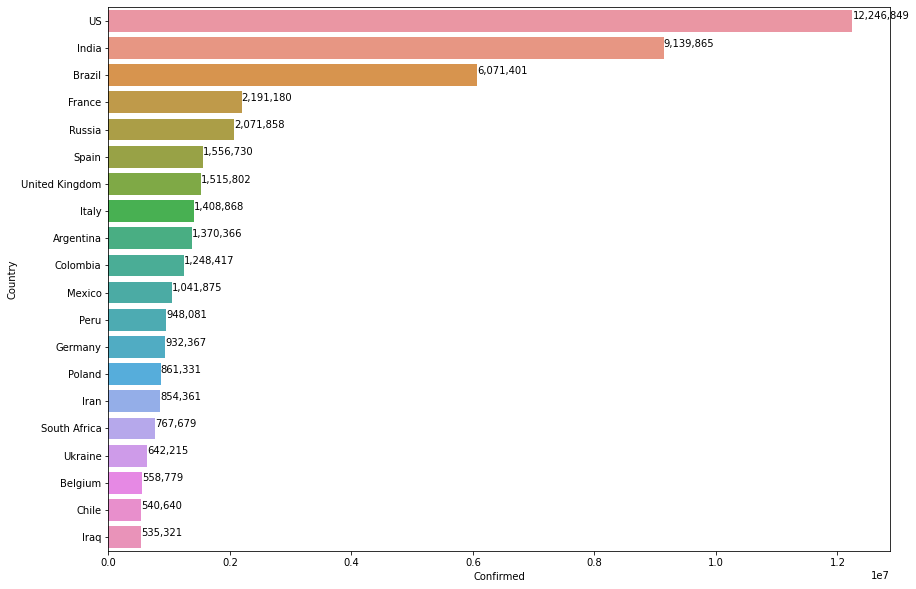

In [6]:
# Find top 20 countries with maximum number of confirmed cases
top_20 = world.sort_values(by=['Confirmed'], ascending=False).head(20)

# Generate a Barplot
plt.figure(figsize=(14,10))

plot = sns.barplot(top_20['Confirmed'], top_20['Country'])
for i,(value,name) in enumerate(zip(top_20['Confirmed'],top_20['Country'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



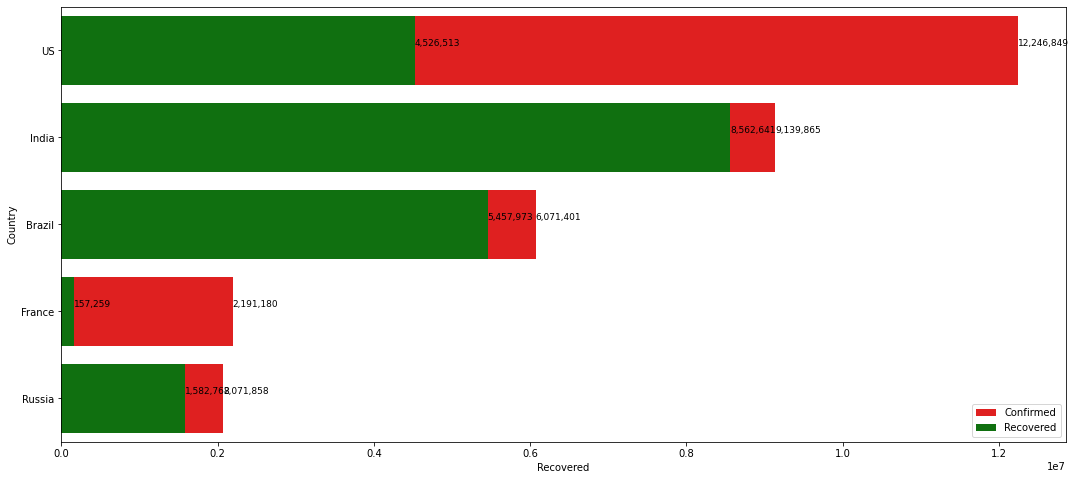

In [7]:
top_5 = world.sort_values(by=['Confirmed'], ascending=False).head()

### Generate a Barplot
plt.figure(figsize=(18,8))
confirmed = sns.barplot(top_5['Confirmed'], top_5['Country'], color = 'red', label='Confirmed')
recovered = sns.barplot(top_5['Recovered'], top_5['Country'], color = 'green', label='Recovered')

### Add Texts for Barplots
for i,(value,name) in enumerate(zip(top_5['Confirmed'],top_5['Country'])):
    confirmed.text(value,i-0.05,f'{value:,.0f}',size=9)
for i,(value,name) in enumerate(zip(top_5['Recovered'],top_5['Country'])):
    recovered.text(value,i-0.05,f'{value:,.0f}',size=9)
plt.legend(loc=4)
plt.show()

In [8]:
# Genrating the choropleth Map of Countries with Confirmed cases
figure = px.choropleth(world, 
                       locations='Country',
                       locationmode='country names',
                       color='Confirmed',
                       hover_name='Country',
                       color_continuous_scale='tealgrn',
                       range_color=[1,1000000],
                       title='Countries with Confirmed cases')
figure.show()